# Machine learning model to predict the aggregate rating of a restaurant based on other features.

In [33]:
import pandas as pd

### Cleaning the dataset

In [34]:
import pandas as pd
import re

# Load the dataset
data = pd.read_csv('Dataset .csv')

# Define a regex pattern to match both "��" and "?_"
pattern = r'��+|\�_'


data = data.apply(lambda col: col.map(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x))


data.to_csv('cleaned_dataset.csv', index=False)


In [93]:
data.head()

,Country Code,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,162,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,162,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,162,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,162,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [106]:
#num__Average Cost for two	num__Price range	num__Votes	cat__Country Code	cat__Currency	
#cat__Has Table booking	cat__Has Online delivery	cat__Is delivering now	cat__Switch to order menu	
#cat__Rating color	cat__Rating text

data['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds()',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

### Gaining necessary informations

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [37]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [38]:
data['Currency'].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds()                    80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

In [39]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [40]:
data['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [41]:
data['Rating color'].value_counts()

Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64

In [42]:
data['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [43]:
for i in range(1, len(data.columns)):
    print(data[data.columns[i]].value_counts())
    print("_________")

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7445, dtype: int64
_________
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64
_________
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
_________
Address
Dilli Haat, INA, New Delhi 

## Pre-Processing Steps

In [44]:
data = data.drop('Restaurant ID', axis=1)
data = data.drop('Restaurant Name', axis=1)
data = data.drop('City', axis=1)
data = data.drop('Cuisines', axis=1)

data = data.drop('Address', axis=1)
data = data.drop('Locality', axis=1)
data = data.drop('Locality Verbose', axis=1)
data = data.drop('Longitude', axis=1)
data = data.drop('Latitude', axis=1)


# Dropping these columns as they are not evenly distributed like cities, cuisines and some features like id and name doesnot
# provide much information for training the model


In [45]:
data.isnull().sum()

Country Code            0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [46]:
data.duplicated().sum()

2871

In [47]:
categorical = data.columns[data.dtypes == "object"]

In [48]:
categorical

Index(['Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [49]:
non_categorical = data.columns[data.dtypes != "object"]

In [50]:
non_categorical

Index(['Country Code', 'Average Cost for two', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

In [51]:
data[non_categorical].info

<bound method DataFrame.info of       Country Code  Average Cost for two  Price range  Aggregate rating  Votes
0              162                  1100            3               4.8    314
1              162                  1200            3               4.5    591
2              162                  4000            4               4.4    270
3              162                  1500            4               4.9    365
4              162                  1500            4               4.8    229
...            ...                   ...          ...               ...    ...
9546           208                    80            3               4.1    788
9547           208                   105            3               4.2   1034
9548           208                   170            4               3.7    661
9549           208                   120            4               4.0    901
9550           208                    55            2               4.0    591

[9551 rows x 5 colu

In [52]:
for col in categorical:
    print(data[col].value_counts())
    print(f"Total Categories: {len(data[col].value_counts())}")
    print("___________")

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds()                    80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64
Total Categories: 12
___________
Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64
Total Categories: 2
___________
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64
Total Categories: 2
___________
Is delivering now
No     9517
Yes      34
Name: count, dtype: int64
Total Categories: 2
___________
Switch to order menu
No    9551
Name: count, dtype: int64
Total Categories: 1
___________
Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64
Total Categorie

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='count'>

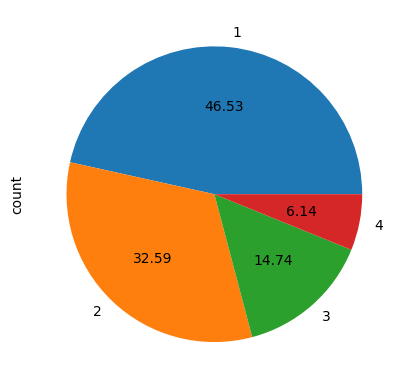

In [54]:
data['Price range'].value_counts().plot(kind='pie', autopct = '%.2f')

/n


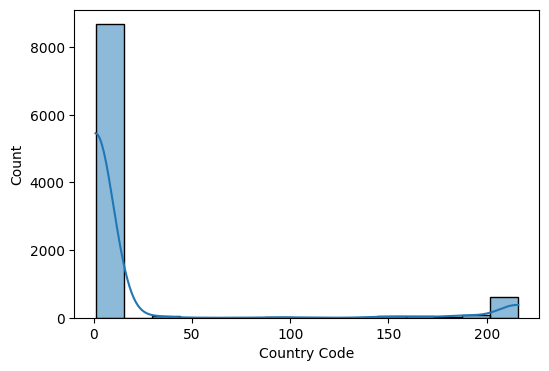

/n


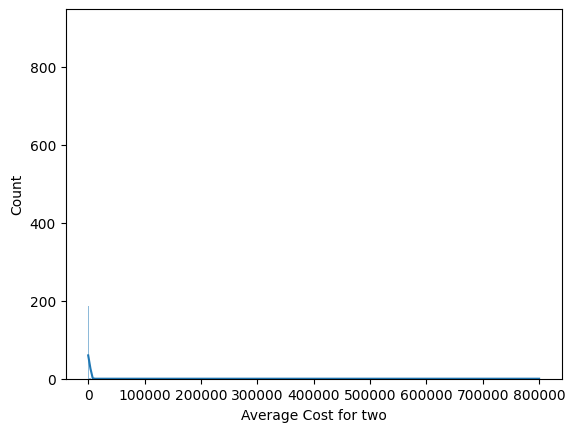

/n


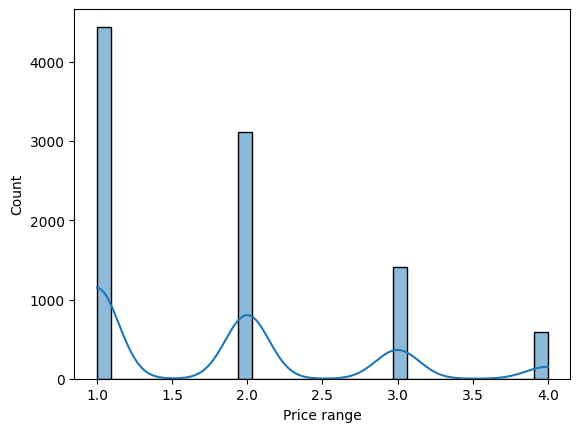

/n


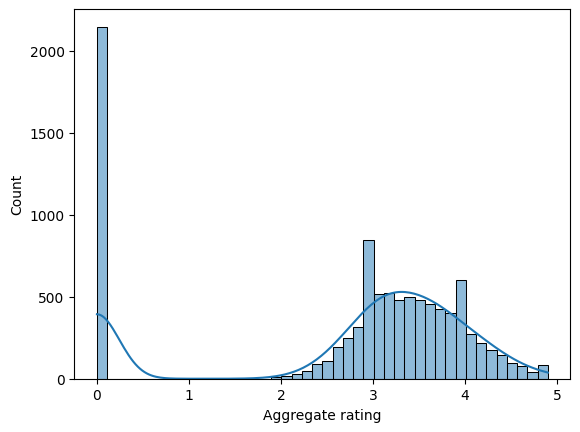

/n


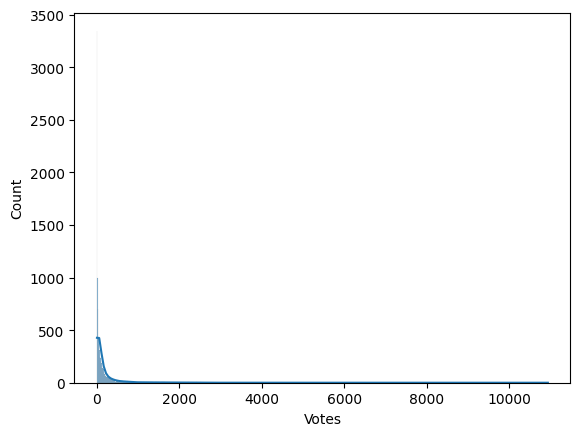

In [55]:
import matplotlib.pyplot as plt
import seaborn as snb
plt.figure(figsize=(6, 4))
for col in non_categorical:
    snb.histplot(data=data, x=col, kde=True)
    print("/n")
    plt.show()

<Axes: >

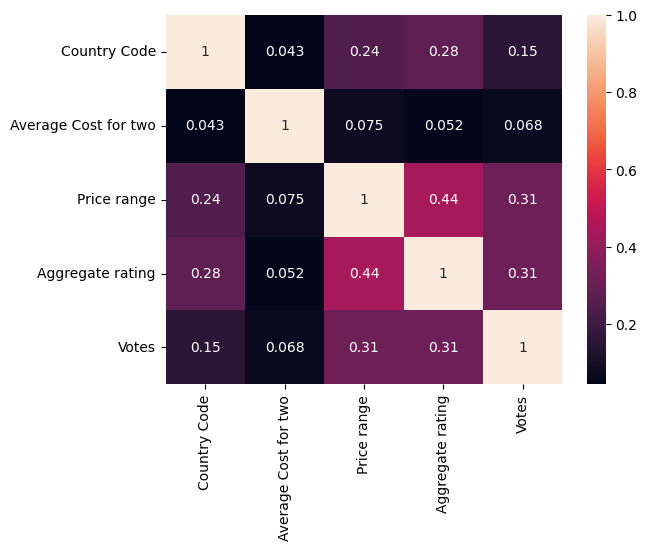

In [56]:
snb.heatmap(data[non_categorical].corr(), annot=True)

<Axes: xlabel='Rating text', ylabel='Votes'>

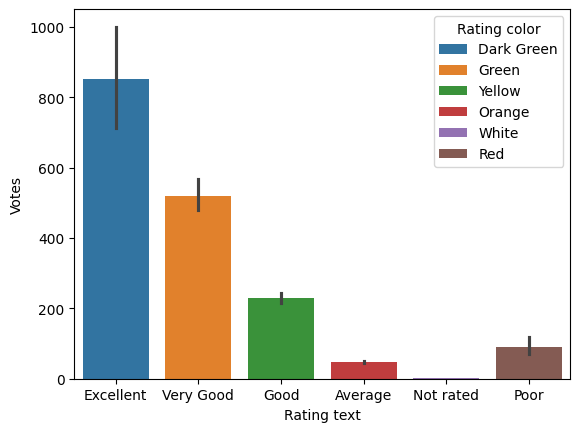

In [57]:
sns.barplot(x=data["Rating text"],y=data["Votes"],hue =data["Rating color"])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

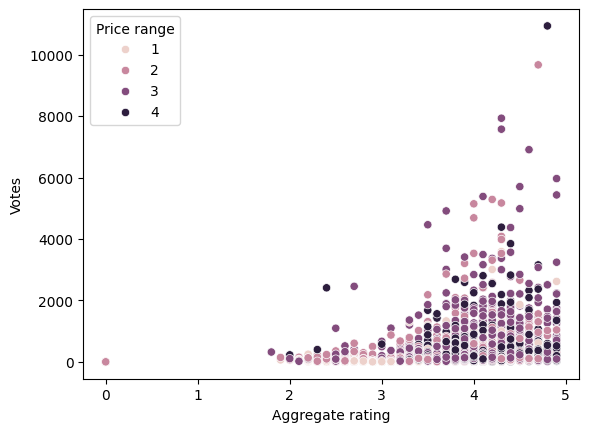

In [58]:
sns.scatterplot(x=data["Aggregate rating"],y=data["Votes"],hue=data["Price range"])

### Creating pipelines to automate the processes for numerical and categorical data

In [59]:
from sklearn.impute import SimpleImputer # It is used to handle missing values in a column with mean, median or anything like that
from sklearn.preprocessing import StandardScaler # Used for removing the mean and make variance close to unity, it is a feature scalling technique
from sklearn.preprocessing import LabelEncoder # used for categorical data to make the classes turn to numerical in order to process easily
from sklearn.pipeline import Pipeline # Creates pipeline to move the data automatically from one process to another
from sklearn.compose import ColumnTransformer # Its is pipeline friendly when we need to perform multi process on the data separately.
from sklearn.preprocessing import OrdinalEncoder

In [60]:
data.columns

Index(['Country Code', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [61]:
X = data.drop('Aggregate rating', axis=1)
y = data['Aggregate rating']

In [62]:
categorical_columns = ['Country Code', 'Currency', 
                       'Has Table booking', 'Has Online delivery', 
                       'Is delivering now', 'Switch to order menu', 
                       'Rating color', 'Rating text']
numeric_columns = ['Average Cost for two', 'Price range', 'Votes']

In [63]:
# Pipeline for categorical data preprocessing (imputing + encoding)
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder())
    ]
)

In [64]:
# Pipeline for numerical data (e.g., imputing missing values + scaling)
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

In [65]:
# ColumnTransformer to combine both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numeric_columns),
        ("cat", cat_pipeline, categorical_columns)
    ]
)

In [66]:
X.head(5)

,Country Code,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
0,162,1100,Botswana Pula(P),Yes,No,No,No,3,Dark Green,Excellent,314
1,162,1200,Botswana Pula(P),Yes,No,No,No,3,Dark Green,Excellent,591
2,162,4000,Botswana Pula(P),Yes,No,No,No,4,Green,Very Good,270
3,162,1500,Botswana Pula(P),No,No,No,No,4,Dark Green,Excellent,365
4,162,1500,Botswana Pula(P),Yes,No,No,No,4,Dark Green,Excellent,229


In [67]:
y.head(5)

0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64

## Model Building

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [69]:
X_test.shape, X_train.shape



((2866, 11), (6685, 11))

In [70]:
y_train.size

6685

In [71]:
preprocessor.fit_transform(X_train)

array([[-0.0455293 ,  0.21867496, -0.25870357, ...,  0.        ,
         5.        ,  2.        ],
       [-0.0455293 ,  0.21867496, -0.33950722, ...,  0.        ,
         2.        ,  0.        ],
       [-0.03927434,  0.21867496, -0.363273  , ...,  0.        ,
         4.        ,  3.        ],
       ...,
       [-0.06116669, -0.89046169, -0.363273  , ...,  0.        ,
         4.        ,  3.        ],
       [ 0.02327523,  2.43694825, -0.20641885, ...,  0.        ,
         1.        ,  5.        ],
       [-0.03927434,  0.21867496,  0.10015969, ...,  0.        ,
         5.        ,  2.        ]])

In [72]:
preprocessor.transform(X_test)

array([[-0.05491173, -0.89046169, -0.23493779, ...,  0.        ,
         3.        ,  4.        ],
       [-0.03301938,  0.21867496, -0.16364045, ...,  0.        ,
         1.        ,  5.        ],
       [-0.04240182,  0.21867496, -0.27771619, ...,  0.        ,
         2.        ,  0.        ],
       ...,
       [-0.0298919 ,  0.21867496,  0.49467162, ...,  0.        ,
         5.        ,  2.        ],
       [-0.05803921, -0.89046169, -0.363273  , ...,  0.        ,
         4.        ,  3.        ],
       [-0.05803921,  2.43694825, -0.28246935, ...,  0.        ,
         5.        ,  2.        ]])

In [73]:
preprocessor.get_feature_names_out()

array(['num__Average Cost for two', 'num__Price range', 'num__Votes',
       'cat__Country Code', 'cat__Currency', 'cat__Has Table booking',
       'cat__Has Online delivery', 'cat__Is delivering now',
       'cat__Switch to order menu', 'cat__Rating color',
       'cat__Rating text'], dtype=object)

In [74]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [89]:
X_train

,num__Average Cost for two,num__Price range,num__Votes,cat__Country Code,cat__Currency,cat__Has Table booking,cat__Has Online delivery,cat__Is delivering now,cat__Switch to order menu,cat__Rating color,cat__Rating text
0,-0.045529,0.218675,-0.258704,0.0,4.0,0.0,0.0,0.0,0.0,5.0,2.0
1,-0.045529,0.218675,-0.339507,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0
2,-0.039274,0.218675,-0.363273,0.0,4.0,0.0,0.0,0.0,0.0,4.0,3.0
3,-0.026764,1.327812,0.173834,0.0,4.0,0.0,0.0,0.0,0.0,5.0,2.0
4,-0.064294,-0.890462,-0.363273,0.0,4.0,0.0,0.0,0.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6680,-0.064294,-0.890462,-0.363273,0.0,4.0,0.0,0.0,0.0,0.0,4.0,3.0
6681,-0.036147,0.218675,-0.185030,0.0,4.0,0.0,1.0,0.0,0.0,5.0,2.0
6682,-0.061167,-0.890462,-0.363273,0.0,4.0,0.0,0.0,0.0,0.0,4.0,3.0
6683,0.023275,2.436948,-0.206419,0.0,4.0,0.0,0.0,0.0,0.0,1.0,5.0


In [76]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [77]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}

In [78]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [79]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost']

In [80]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [81]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost'])

In [82]:
list(models.values())[1]

Lasso()

In [83]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [84]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 1.3048513129809818
MAE: 0.9578875658486377
R2 SCORE: 0.42334249658878453


model training performance Lasso()
MSE: 2.1768510143904862
MAE: 1.198231166434192
R2 SCORE: 0.03797661942891006


model training performance Ridge()
MSE: 1.3048423589125697
MAE: 0.957865017778067
R2 SCORE: 0.42334645369154755


model training performance ElasticNet()
MSE: 1.9193322410185856
MAE: 1.1200246058136298
R2 SCORE: 0.15178279140945905


model training performance RandomForestRegressor()
MSE: 0.03498550380124197
MAE: 0.1258646091898686
R2 SCORE: 0.984538733971522


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_const

In [85]:
r2_list

[0.42334249658878453,
 0.03797661942891006,
 0.42334645369154755,
 0.15178279140945905,
 0.984538733971522,
 0.9858767151222741]

In [86]:
max(r2_list)

0.9858767151222741

# Summary of Results:
## LinearRegression()
### MSE: 1.30
### MAE: 0.96
### R²: 0.423
### Performance is mediocre with an R² of 0.423, meaning the model explains about 42.3% of the variance in the data.

## Lasso():
### MSE: 2.17
### MAE: 1.20
### R²: 0.038
### Poor performance with a very low R² of 0.038. The Lasso model is underfitting and not explaining much of the variance.

## Ridge():
### MSE: 1.30
### MAE: 0.96
### R²: 0.423
### Almost identical performance to Linear Regression, as expected with Ridge being a regularized version of linear regression.

## ElasticNet():
### MSE: 1.92
### MAE: 1.12
### R²: 0.151
### Somewhat better than Lasso but still underperforming with an R² of only 0.151.

## RandomForestRegressor()
### MSE: 0.035
### MAE: 0.13
### R²: 0.985
### Excellent performance. Very low errors and an R² of 0.985, indicating the model explains 98.5% of the variance.

## XGBRegressor()
### MSE: 0.032
### MAE: 0.12
### R²: 0.986
### Similar to RandomForest, with a slight improvement in MSE and MAE. R² is also very high at 0.986.

## Conclusion:
### RandomForestRegressor and XGBRegressor are performing the best, with extremely low errors and very high R² scores, indicating excellent performance and almost perfect predictions.
### LinearRegression, Ridge, and ElasticNet are underperforming, but acceptable for baseline comparisons.
### Lasso is the weakest, with poor results.
### RandomForestRegressor and XGBRegressor are providing the best results. We can take any model from the two.